In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
from scipy import integrate
import math

# Figure 1

Text(0, 0.5, 'P(θ)')

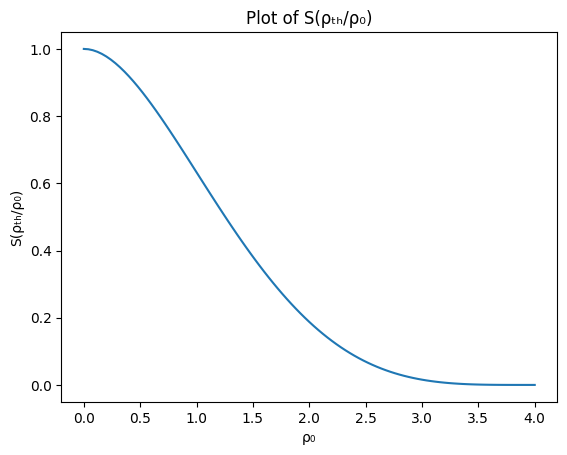

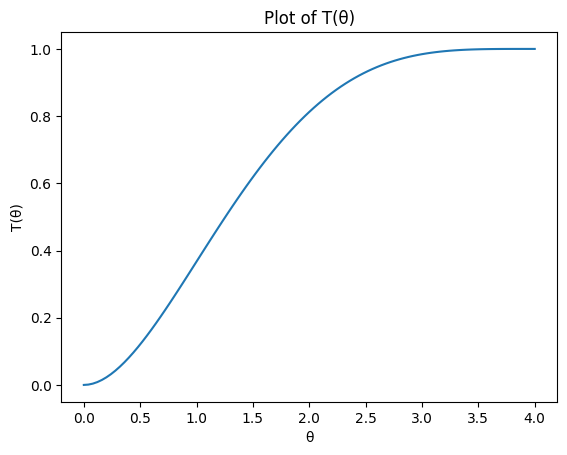

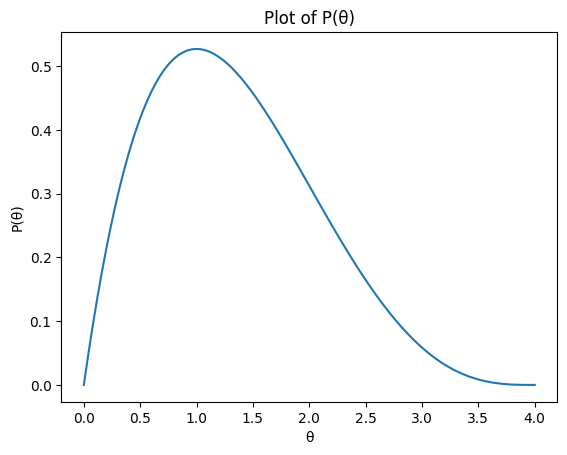

In [ ]:

#define symbols for plot names
theta = unicodedata.lookup('GREEK SMALL LETTER THETA')
rho = unicodedata.lookup('GREEK SMALL LETTER RHO')
sub_0 = '\u2080'
sub_h = '\u2095'
sub_t = '\u209C'

#Define P(theta)
def calc_pdf(x):
  y = 5*x/(256)*(4-x)**3
  return y

#Define T(theta)
def calc_int_pdf(x):
  y = 5/256*x**2*(-x**3/5+3*x**2-16*x+32)
  return y

#Define S(rho)
def calc_S(x):
  y = calc_int_pdf(4) - calc_int_pdf(x)
  return y

#Calculate functions for 0 < theta < 4
theta_vals = np.linspace(0,4,101)
pdf = calc_pdf(theta_vals)
int_pdf = calc_int_pdf(theta_vals)
fos = calc_S(theta_vals)

#Plot figures
plt.figure(1)
plt.plot(theta_vals,fos)
plt.title(f"Plot of S({rho}{sub_t}{sub_h}/{rho}{sub_0})")
plt.xlabel(f"{rho}{sub_0}")
plt.ylabel(f"S({rho}{sub_t}{sub_h}/{rho}{sub_0})")

plt.figure(2)
plt.plot(theta_vals,int_pdf)
plt.title(f"Plot of T({theta})")
plt.xlabel(f"{theta}")
plt.ylabel(f"T({theta})")

plt.figure(3)
plt.plot(theta_vals,pdf)
plt.title(f"Plot of P({theta})")
plt.xlabel(f"{theta}")
plt.ylabel(f"P({theta})")


# Figure 2

# 1.1 PEAK Mass Model g

In [ ]:
#Define f(m)
def f_func(m,dm):
  f = np.exp(dm/m + dm/(m-dm))
  f_inv = 1/(f+1)
  return f_inv

#Define S(m)
def S_func(mlist,mmin,dm):
  case1 = np.where(mlist<=mmin)
  mv1 = mlist.copy()
  update = np.zeros(len(case1[0]))
  mv1[case1] = update

  case2 = np.where((mmin < mlist) & (mlist < mmin + dm))
  mv2 = mv1.copy()
  update2 = (f_func(mv2[case2]-mmin,dm))
  mv2[case2] = update2

  case3 = np.where(mlist>=mmin+dm)
  mv3 = mv2.copy()
  update3 = 1*np.ones(len(case3[0]))
  mv3[case3] = update3
  return mv3

#Define G(m)
def calc_gaussian(m,mu,sigma):
  norm = 1/(sigma*np.sqrt(2*np.pi))
  gauss = norm*np.exp(-1*(m-mu)**2/(2*sigma**2))
  return gauss

#Define B(m)
def power_law(m,alph,mmin,mmax):

  case1 = np.where(m<mmax)
  mv1 = m.copy()
  update = (mv1[case1])**(-1*alph)
  mv1[case1] = update

  case2 = np.where(m>=mmax)
  mv2 = mv1.copy()
  update2 = np.zeros(len(case2[0]))
  mv2[case2] = update2

  return mv2

#Define

#Combine it all into f/g
def g_pdf_peak_norm(m,lamb,alph,mmin,dm,mmax,mu_m,sigm_m): #Use for normalisation factor
  part1 = power_law(m,alph,mmin,mmax)*S_func(m,mmin,dm)
  part2 = calc_gaussian(m,mu_m,sigm_m)*S_func(m,mmin,dm)
  #Normalize each part individually
  dm1 = m[1]-m[0]
  diff = np.abs(np.diff(m))
  I1 = np.sum(part1*dm1)
  norm1 = 1/I1
  I2 = np.sum(part2*dm1)
  norm2 = 1/I2
  part1 = (1-lamb)*part1/I1
  part2 = lamb*part2/I2
  #Normalize the entire function
  I3 = np.sum((part1[:-1]+part2[:-1])*diff)
  norm3 = 1/I3
  return norm1,norm2,norm3

def g_pdf_peak(m,lamb,alph,mmin,dm,mmax,mu_m,sigm_m,norm1,norm2): #Use for unnormalised values

  part1 = power_law(m,alph,mmin,mmax)*S_func(m,mmin,dm)
  part2 = calc_gaussian(m,mu_m,sigm_m)*S_func(m,mmin,dm)
  #Normalize each part individually
  part1 = (1-lamb)*part1*norm1
  part2 = lamb*part2*norm2
  #Normalize the entire function

  m_pdf = part1+part2

  return m_pdf


# 1.1.1 Test S and G

Text(0.5, 0, 'm1')

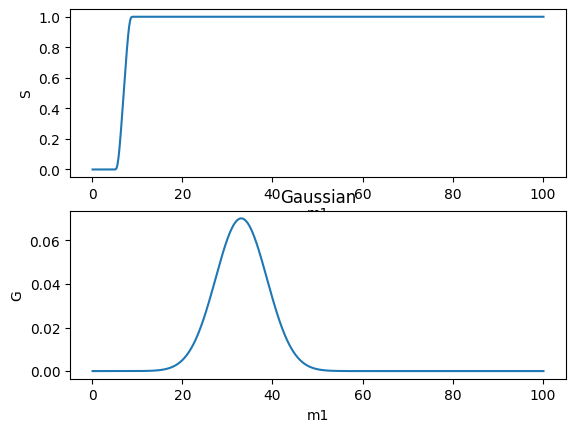

In [ ]:
test_m1 = np.linspace(0.1,100.1,1001)
test_m2 = np.linspace(0.1,100.1,1001)
mmin = 4.59
dm = 4.82
mu_m = 33.07
sigm_m = 5.69

testS = S_func(test_m1,mmin,dm)
testG = calc_gaussian(test_m2,mu_m,sigm_m)

plt.subplot(211)
plt.plot(test_m1,testS)
plt.ylabel('S')
plt.xlabel('m1')

plt.subplot(212)
plt.title('Gaussian')
plt.plot(test_m2,testG)
plt.ylabel('G')
plt.xlabel('m1')



# 1.1.2 Broken Power-Law Mass Model g

In [ ]:
def integrand2(x,alpha,mbreak):
  y = (x/mbreak)**(-alpha)
  return y

def g_pdf_broken_norm(m,alpha1,alpha2,mmin,mmax,dm,b): #Use this for normalisation
  mbreak = mmin + b*(mmax - mmin)
  dm1 = m[1]-m[0]

  case1 = np.where((mmin < m) & (m < mbreak))
  mv1 = m.copy()
  update1 = ((mv1[case1]/mbreak)**(-1*alpha1))*S_func(mv1[case1],mmin,dm)
  I1 = np.sum(update1*dm1) #normalise the first part
  mv1[case1] = update1

  case2 = np.where((mbreak < m) & (m < mmax))
  mv2 = mv1.copy()
  update2 = ((mv2[case2]/mbreak)**(-1*alpha2))*S_func(mv2[case2],mmin,dm)
  I2 = np.sum(update2*dm1) #normalise the second part
  mv2[case2] = update2

  case3 = np.where((m < mmin))
  mv3 = mv2.copy()
  update3 = np.zeros(len(case3[0]))
  mv3[case3] = update3

  case4 = np.where((m > mmax))
  mv4 = mv3.copy()
  update4 = np.zeros(len(case4[0]))
  mv4[case4] = update4

  I3 = I1+I2 #normalise the entire function
  norm =  1/I3
  return norm

def g_pdf_broken(m,alpha1,alpha2,mmin,mmax,dm,b): #Use this for unnormalised values
  mbreak = mmin + b*(mmax - mmin)

  case1 = np.where((mmin < m) & (m < mbreak))
  mv1 = m.copy()
  update1 = ((mv1[case1]/mbreak)**(-1*alpha1))*S_func(mv1[case1],mmin,dm)
  mv1[case1] = update1

  case2 = np.where((mbreak < m) & (m < mmax))
  mv2 = mv1.copy()
  update2 = ((mv2[case2]/mbreak)**(-1*alpha2))*S_func(mv2[case2],mmin,dm)
  mv2[case2] = update2

  case3 = np.where((m < mmin))
  mv3 = mv2.copy()
  update3 = np.zeros(len(case3[0]))
  mv3[case3] = update3

  case4 = np.where((m > mmax))
  mv4 = mv3.copy()
  update4 = np.zeros(len(case4[0]))
  mv4[case4] = update4

  return mv4


#1.1.3 Define f(q)

In [ ]:
def f_pdf(m2,beta,mmin,dm):
  mv1 = (m2**(beta))*S_func(m2,mmin,dm)
  return mv1

In [ ]:
def f_pdf_norm(beta,m1,mmin,dm):
  ylist = [] #normalisation list

  normlist = np.linspace(0.1,m1,1000) #arrays to integrate from 0 tot m1
  normlist = np.transpose(normlist) #Change the arrays to the right shape
  dm1 = normlist[0:,1]-normlist[0:,0] #integral step size for each integral
  y = (normlist**beta)*S_func(normlist,mmin,dm) #value of function for each integral
  yval = 1/(np.sum(y,axis = 1)*dm1) #norm factor based on integral value for each m1
  ylist.append(yval) #add to normalisation list
  ylist = np.array(ylist)
  return ylist

In [ ]:
n1 = 10
n2 = 3
xlist = np.linspace(0.1,1,n1)
zlist = np.zeros(n1)
ylist = np.linspace(0,xlist,n2)

print(ylist)
ylist = np.transpose(ylist)
print('ylist is %s' %ylist)
stepsize = ylist[0:,1]-ylist[0:,0]
print('stepsize is %s' %stepsize)
#print(' sum is %s' %np.sum(ylist,axis = 1))
#mlist = np.linspace(10,100,10)
final = np.sum(ylist,axis=1)*stepsize
print(np.shape(final))
print('final %s' %final)


[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
 [0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.  ]]
ylist is [[0.   0.05 0.1 ]
 [0.   0.1  0.2 ]
 [0.   0.15 0.3 ]
 [0.   0.2  0.4 ]
 [0.   0.25 0.5 ]
 [0.   0.3  0.6 ]
 [0.   0.35 0.7 ]
 [0.   0.4  0.8 ]
 [0.   0.45 0.9 ]
 [0.   0.5  1.  ]]
stepsize is [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
(10,)
final [0.0075 0.03   0.0675 0.12   0.1875 0.27   0.3675 0.48   0.6075 0.75  ]


# 1.2 Calculate x1(=m2) and dx1/dm

In [ ]:
#Define constants
def dx1dm_calc(m1,m_c):
  #Calculate functions
  a = (m_c**(5/3))/((2**(1/3))*(3**(2/3))*(m1**(3/2)))
  b = (9*m1**(5/2) + (81*(m1**5) - 12*(m_c**5))**(0.5))**(1/3)
  c = (9*m1**(5/2) - (81*(m1**5) - 12*(m_c**5))**(0.5))**(1/3)
  x1 = a*(b+c)
  #Calculate derivative values
  dadm = (5/3)*(m_c**(2/3))/((2**(1/3))*(3**(2/3))*(m1**(3/2)))
  dbdm = (1/3)*(b**(-2))*(-30*m_c**(4)*(81*m1**5-12*m_c**5)**(-1/2))
  dcdm = (1/3)*(c**(-2))*( 30*m_c**(4)*(81*m1**5-12*m_c**5)**(-1/2))
  #Calculate total derivative
  dx1dm = dadm*(b+c) + a*(dbdm+dcdm)
  return x1, dx1dm


# Test f(q)

<ipython-input-3-ef355306ade9>:3: RuntimeWarning: overflow encountered in exp
  f = np.exp(dm/m + dm/(m-dm))


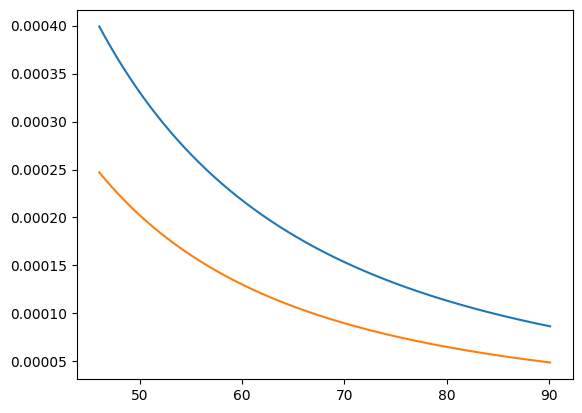

In [ ]:
mmin1 = 4.59
dm1 = 4.82
beta1 = 1.26

mmin2 = 3.96
dm2 = 4.83
beta2 = 1.40

mcval = 40
m1min = (2)**(1/5)*mcval
m1max = 90
m1_list = np.linspace(m1min+0.1,m1max+0.1,1000)

ytest1 = f_pdf_norm(beta1,m1_list,mmin1,dm1)
x1test = dx1dm_calc(m1_list,mcval)
ytest2 = f_pdf_norm(beta2,m1_list,mmin1,dm1)
plt.plot(m1_list,ytest1[0])
plt.plot(m1_list,ytest2[0])

# 1.2.1 Test G(m1) for both models

Text(0, 0.5, 'p(m1)')

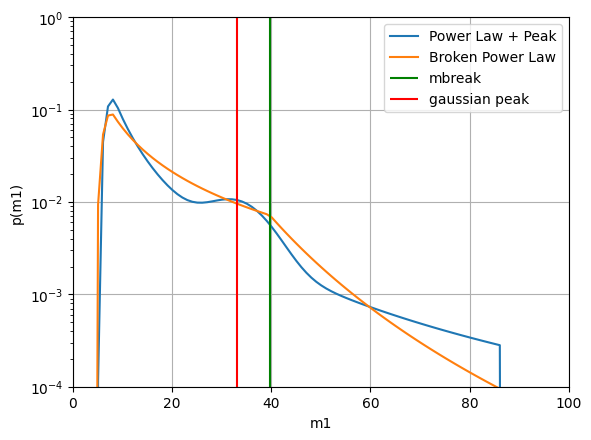

In [ ]:
#constant for peak model
lamb = 0.10
alph = 2.63
mmin = 4.59
dm = 4.82
mmax = 86.22
mu_m = 33.07
sigm_m = 5.69
#constants for broken model
alpha1 = 1.58
alpha2 = 5.59
mmin2 = 3.96
mmax2 = 87.14
dm2 = 4.83
b = 0.43
#calculate the pdf's
test_m1 = np.linspace(0.1,100.1,101)
dm1 = test_m1[1] - test_m1[0]

ynorm1 = g_pdf_peak_norm(test_m1,lamb,alph,mmin,dm,mmax,mu_m,sigm_m)
y_test_1 = ynorm1[2]*g_pdf_peak(test_m1,lamb,alph,mmin,dm,mmax,mu_m,sigm_m,ynorm1[0],ynorm1[1])
ynorm2 = g_pdf_broken_norm(test_m1,alpha1,alpha2,mmin2,mmax2,dm2,b)
y_test_2 = ynorm2*g_pdf_broken(test_m1,alpha1,alpha2,mmin2,mmax2,dm2,b)

#plot the pdf's
plt.plot(test_m1,y_test_1,label = 'Power Law + Peak')
plt.plot(test_m1,y_test_2, label = 'Broken Power Law')
plt.vlines(39.7274,10**-6,1,color = 'green',label = 'mbreak')
plt.vlines(mu_m,10**-6,1,color = 'red', label = 'gaussian peak')
plt.legend()
plt.yscale('log')
plt.ylim(10**-4,1)
plt.xlim(0,100)
plt.grid()
plt.xlabel('m1')
plt.ylabel('p(m1)')








# Testing the PDF functions

# Old definitions for phi(M)

In [ ]:
#Define the integrand(s) of phi(M) (analytically)

#Define phi(M) (numerically)
def phi_func_peak_num(m_c_list,lamb,alph,beta,mmin,dm,mmax,mu_m,sigm_m,npts):
  phi_list = []
  for m_c in m_c_list:
    m1min = m_c*(4/27)**(1/5)+0.01
    m1max = 10*m1min
    m1_list = np.linspace(m1min,m1max,npts)
    dm1 = m1_list[1]-m1_list[0]
    phi_integrand = integrand_calc_peak_an(m1_list,dm1,m_c,lamb,alph,beta,mmin,dm,mmax,mu_m,sigm_m)
    phi_val = np.sum(phi_integrand*dm1)
    phi_list.append(phi_val)

  phi_list = np.array(phi_list)
  dm_c = np.abs(np.diff(m_c_list))
  #I1 = np.sum(phi_list)*(m_c_list[1]-m_c_list[0])
  I2 = np.sum(phi_list[:-1]*dm_c)
  #print(I1,I2)
  phi_list = 1/I2*phi_list
  return phi_list

def phi_func_broken_num(m_c_list,alpha1,alpha2,beta,mmin,mmax,dm,b,npts):
  phi_list = []
  for m_c in m_c_list:
    m1min = m_c*(4/27)**(1/5)+0.01
    m1max = 10*m1min
    #m1max = mmax - 0.01
    m1_list = np.linspace(m1min,m1max,npts)
    dm1 = m1_list[1]-m1_list[0]
    phi_integrand = integrand_calc_broken_an(m1_list,dm1,m_c,alpha1,alpha2,beta,mmin,mmax,dm,b)
    phi_val = np.sum(phi_integrand*dm1)
    phi_list.append(phi_val)

  phi_list = np.array(phi_list)
  dm_c = np.abs(np.diff(m_c_list))
  I2 = np.sum(phi_list[:-1]*dm_c)
  I1 = np.sum(phi_list*(m_c_list[1]-m_c_list[0]))

  phi_list = 1/I2*phi_list
  return phi_list


# 1.3 Define ϕ(M) for both models

#Define peak model

In [ ]:
def integrand_peak(m1,m_c,lamb,alph,beta,mmin,dm,mmax,mu_m,sigm_m):
  x1, dx1dm = dx1dm_calc(m1,m_c)
  qlist = x1/m1
  dx1 = np.abs(np.diff(x1))
  dq = np.abs(np.diff(qlist))
  m1norm = np.linspace(0.1,100.1,101)
  y2norm = g_pdf_peak_norm(m1norm,lamb,alph,mmin,dm,mmax,mu_m,sigm_m)
  #y1 = f_pdf(x1,dq,beta,m1,mmin,dm)
  y1 = f_pdf_norm(beta,m1,mmin,dm)*f_pdf(x1,beta,mmin,dm)
  y2 = y2norm[2]*g_pdf_peak(m1,lamb,alph,mmin,dm,mmax,mu_m,sigm_m,y2norm[0],y2norm[1])
  ytot  = y1*y2*dx1dm
  return ytot

In [ ]:
def phi_peak(m_c_list,lamb,alph,beta,mmin,dm,mmax,mu_m,sigm_m,npts):
  phi_list = []
  for m_c in m_c_list:
    m1min = m_c*(2)**(1/5)+0.01
    m1max = mmax+5
    m1_list = np.linspace(m1min,m1max,npts)
    dm1 = m1_list[1]-m1_list[0]
    phi_integrand = integrand_peak(m1_list,m_c,lamb,alph,beta,mmin,dm,mmax,mu_m,sigm_m)
    phi_val = np.sum(phi_integrand*dm1)
    phi_list.append(phi_val)

  phi_list = np.array(phi_list)
  dm_c = np.abs(np.diff(m_c_list))
  I1 = np.sum(phi_list)*(m_c_list[1]-m_c_list[0])
  I2 = np.sum(phi_list[:-1]*dm_c)
  phi_list = 1/I2*phi_list
  return phi_list

#Define broken model

In [ ]:
def integrand_broken(m1,m_c,alpha1,alpha2,beta,mmin,mmax,dm,b):
  #Calculate m2 from m1 and Mc
  x1, dx1dm = dx1dm_calc(m1,m_c)
  dx1 = np.abs(np.diff(x1))
  m1norm = np.linspace(0.1,100.1,101)
  #Calculate q from m2 and m1
  qlist = x1/m1
  dq = np.abs(np.diff(qlist))
  #calculate f and normalise it
  y1 = f_pdf_norm(beta,m1,mmin,dm)*f_pdf(x1,beta,mmin,dm)
  #calculate g and normalise it
  y2norm = g_pdf_broken_norm(m1norm,alpha1,alpha2,mmin,mmax,dm,b)
  y2 = g_pdf_broken(m1,alpha1,alpha2,mmin,mmax,dm,b)*y2norm
  #combine into final integrand
  ytot = y1*y2*dx1dm
  return ytot

In [ ]:
def phi_broken(m_c_list,alpha1,alpha2,beta,mmin,mmax,dm,b,npts):
  phi_list = []
  for m_c in m_c_list:
    m1min = m_c*(2)**(1/5)+0.01
    m1max = mmax+5
    m1_list = np.linspace(m1min,m1max,npts)
    phi_integrand = integrand_broken(m1_list,m_c,alpha1,alpha2,beta,mmin,mmax,dm,b)
    dm1 = m1_list[1]-m1_list[0]
    phi_val = np.sum(phi_integrand*dm1)
    phi_list.append(phi_val)

  phi_list = np.array(phi_list)
  dm_c = np.abs(np.diff(m_c_list))
  I2 = np.sum(phi_list[:-1]*dm_c)
  I1 = np.sum(phi_list*(m_c_list[1]-m_c_list[0]))

  phi_list = 1/I1*phi_list
  return phi_list


# 1.3 Test phi(M)

<ipython-input-3-ef355306ade9>:3: RuntimeWarning: overflow encountered in exp
  f = np.exp(dm/m + dm/(m-dm))


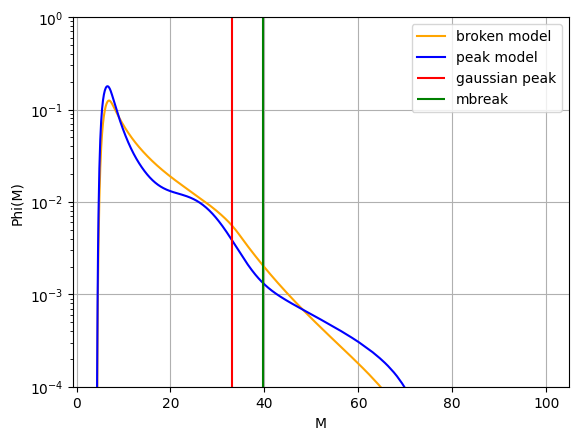

In [ ]:
#Define variables
lamb = 0.10
alph = 2.63
mmin = 4.59
dm = 4.82
mmax = 86.22
mu_m = 33.07
sigm_m = 5.69
beta = 1.26
#Define variables for second model
alpha1 = 1.58
alpha2 = 5.59
mmin2 = 3.96
mmax2 = 87.14
beta2 = 1.40
dm2 = 4.83
b = 0.43

#Calculate phi(M)
npoints = 1000
m_c_list =  np.linspace(4,100,1001)
dmc = m_c_list[1]-m_c_list[0]
phi_m = phi_peak(m_c_list,lamb,alph,beta,mmin,dm,mmax,mu_m,sigm_m,npoints)
phi_m2 = phi_broken(m_c_list,alpha1,alpha2,beta2,mmin,mmax,dm,b,npoints)
#Plot the models
plt.plot(m_c_list,phi_m2,label = 'broken model',color = 'orange')
plt.plot(m_c_list,phi_m,label = 'peak model',color = 'b')
plt.vlines(mu_m,10**-6,1,color = 'red', label = 'gaussian peak')
plt.vlines(39.7274,10**-6,1,color = 'green',label = 'mbreak')
plt.legend()
plt.ylabel('Phi(M)')
plt.xlabel('M')
plt.yscale('log')
plt.ylim(10**-4,1)
plt.grid()

# 1.4 Define n_GW

In [ ]:
def n_GW_calc(R,z,m1,m2,m_c,rho_th):
  integrand = phi_func(m1,m2,m_c)*calc_S(rho_th)
  integral = integrand
  result = R/(1+z)*integral
  return result

# 0. Combining everything

Power-Law + PEAK Mass Model

In [ ]:
#Define constants
m1 = 1
m2 = 1
m_c = (m1*m2)**(3/5)/(m1+m2)**(1/5)
mmin = 4.59 #in M_sol
mmax = 86.22 #in M_sol
dm = 4.82 #in M_sol
alpha = 2.63
lambd = 0.10
mu_m = 33.07 #in M_sol
sigm_m = 5.69 #in M_sol

rho_0 = 1
rho_th = 1
f_pdf = 1
g_pdf = 1
phi_func = []
SNR_func = []
integral_1 = 1
integral_2 = 1

#Calculate S_gw
S_gw = rho_th*integral_1/integral_2

#Plot S_gw



Broken Power-Law Mass Model